In [74]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

np.random.seed(123)

In [31]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [32]:
#from scipy.stats import poisson
#drivethru_cars = poisson.rvs(mu=2, size=10000)

In [33]:
drivethru_cars = stats.poisson.rvs(mu=2, size=10000)

[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

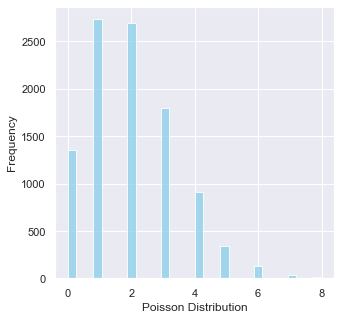

In [34]:
ax = sns.histplot(drivethru_cars,
                  bins=30,
                  kde=False,
                  color='skyblue')
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

#### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

#### What is the probability that no cars drive up in the noon hour?
#### What is the probability that 3 or more cars come through the drive through?
#### How likely is it that the drive through gets at least 1 car?

In [125]:
dthru_cars = poisson.rvs(mu=2, size=10000)
dthru_cars

array([1, 2, 0, ..., 3, 1, 2])

In [133]:
#create a df of the array created

df = pd.DataFrame(dthru_cars)
df.head()

,0
0,1
1,2
2,0
3,4
4,4


In [134]:
#add a column called dthru_cars
df['dthru_cars'] = df.sum(axis = 1)
df.head()

,0,dthru_cars
0,1,1
1,2,2
2,0,0
3,4,4
4,4,4


In [131]:
(df.dthru_cars == 0).mean()

0.1317

In [132]:
(df.dthru_cars >= 3).mean()

0.3286

In [24]:
#mean is 3 and target is 0. (avg cars is 3 and we want to know prob of zero cars)
stats.poisson(2).pmf(0)

0.1353352832366127

In [161]:
stats.poisson(2).sf(2)  #use sf to get the area that is greater than 2. We want what's 3 or more.

0.32332358381693654

In [162]:
#stats.poisson(2).pmf(1)
stats.poisson(2).sf(0)

0.8646647167633873

#### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

#### What grade point average is required to be in the top 5% of the graduating class?
#### What GPA constitutes the bottom 15% of the class?
#### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
#### If I have a GPA of 3.5, what percentile am I in?

In [165]:
#simulation:
grades = np.random.normal(loc = 3.0, scale = .3, size = 10_000).round(1)

In [166]:
#simulation array.
grades

array([3. , 3.1, 3.1, ..., 2.9, 2.9, 2.8])

In [167]:
#now create a df
df = pd.DataFrame(grades)
df.head()

,0
0,3.0
1,3.1
2,3.1
3,3.3
4,2.9


In [168]:
#now add a column to the df so you can call it(?)
df['grades'] = df.sum(axis = 1)
df.head()

,0,grades
0,3.0,3.0
1,3.1,3.1
2,3.1,3.1
3,3.3,3.3
4,2.9,2.9


In [169]:
df.grades.quantile(.95).values

AttributeError: 'numpy.float64' object has no attribute 'values'

In [39]:
grade_distribution = stats.norm(3.0, .3)

In [42]:
top_5_percent = grade_distribution.ppf(.95)

In [43]:
top_5_percent

3.4934560880854417

In [44]:
bottom_15_percent = grade_distribution.ppf(.15)

In [46]:
bottom_15_percent

2.689069983151863

In [52]:
grade_distribution.cdf(2.8)

#the 3rd decile is .20-.30 of the class.

0.2524925375469227

In [54]:
grade_distribution.ppf(.20)

2.7475136299281258

In [55]:
grade_distribution.ppf(.30)

2.842679846187588

In [56]:
grade_distribution.cdf(3.5)

0.9522096477271853

In [ ]:
#A GPA of 3.5 is in the top 5%

In [57]:
grade_distribution.sf(3.5)

0.0477903522728147

#### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [171]:
clicks = stats.binom(4326, .02)

In [172]:
clicks

In [173]:
clicks.sf(96) #this is 96 because we want everything that is 97 and above.  
              #using 97 would give us the prob of above 97 only.

0.1397582363130086

In [144]:
#using simulation
outcomes = [0,1]
#0 is no click, 1 is a click
trials = 4326
clicks = np.random.choice(outcomes, (10_000, trials), p = [0.98, 0.02])
clicks

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [148]:
df = pd.DataFrame(clicks)
df['clicks'] = df.sum(axis=1)

In [149]:
(df.clicks >= 97).mean()

0.136

#### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

#### What is the probability that at least one of your first 60 answers is correct?

In [ ]:
# 1/101 chance; binomial distribution.  60, 1/101

In [36]:
stats.binom(60, 1/101)

In [38]:
stats.binom(60, 1/101).sf(0)

0.44955038406224

In [175]:
outcomes = [0,1]
#0 is incorrect, 1 is correct
trials = 100
hw_problems = np.random.choice(outcomes, (10_000, trials))
hw_problems

array([[1, 1, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 1]])

In [176]:
df = pd.DataFrame(hw_problems)
df['hw_problems'] = df.sum(axis=1)


In [184]:
first_60_problems = df.loc[:, 0:59]

first_60_problems['first_60'] = first_60_problems.sum(axis=1)
(first_60_problems.first_60 > 0).mean()





<ipython-input-184-7ef7444ad0b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_60_problems['first_60'] = first_60_problems.sum(axis=1)


1.0

#### 5. The codeup staff tends to get upset when the student break area is not cleaned up. 
#### Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
#### How likely is it that the break area gets cleaned up each day? 
#### How likely is it that it goes two days without getting cleaned up? All week?

In [47]:
stats.binom(2, .83)  #.83 is the probability the area gets cleaned each day.  
                     # Figure this out by (3 * 22) * .9

In [48]:
stats.binom(2, .83).pmf(0)

0.02890000000000002

#### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [64]:
pan_line_people = stats.norm(15, 3)

In [65]:
pan_line_people

In [69]:
pan_line_people.cdf(17)

0.7475074624530771

In [70]:
#17 people is the max number of people that can be in line in the timeframe I have.  
#If each person takes 2 minutes, and then I have to wait an additional 10, 
#15 people take 30 minutes, 16 people take 32, 17 people take 34 minutes.  34 + 10 = 44 min 
#44 min is within our timeframe.  I'll still have 16 minutes.

#### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

#### What percent of employees earn less than 60,000?
#### What percent of employees earn more than 95,000?
#### What percent of employees earn between 65,000 and 80,000?
#### What do the top 5% of employees make?

In [72]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [76]:
# def get_db_url(username, hostname, password, database):
#     url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
#     return url

#defines function to create a sql url using personal credentials
def get_db_url(db_name):
    
    #importing variables used to connect to sql database
    from env import host, user, password
    
    #creates the url and the function returns it
    url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    return (url)

In [186]:
# get_db_url(user, host, password, 'employees')

# get_db_url("employees")

pd.read_sql('SELECT * FROM salaries WHERE to_date > curdate()', get_db_url('employees'))


,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [187]:
current_employees = pd.read_sql('SELECT * FROM salaries WHERE to_date > curdate()', get_db_url('employees'))
#creating a named dataframe

In [188]:
current_employees.salary.mean()

72012.23585730705

In [189]:
pd.read_sql('SELECT AVG(salary) FROM salaries WHERE to_date > curdate()', get_db_url('employees'))

,AVG(salary)
0,72012.2359


In [190]:
current_employees.salary.std()

17309.99538025198

In [191]:
pd.read_sql('SELECT STDDEV(salary) FROM salaries WHERE to_date > curdate()', get_db_url('employees'))

,STDDEV(salary)
0,17309.959336


In [192]:
#The average salary for current employees is 72012.24...

avg_sal = current_employees.salary.mean()

#The standard deviation is 17309.99...

stdev_sal = current_employees.salary.std()

In [193]:
stats.norm(avg_sal, stdev_sal)

In [194]:
norm_salaries = stats.norm(avg_sal, stdev_sal)

In [195]:
norm_salaries.cdf(60000)
#this is the percentage of employees that make 60,000 or less

0.24385742480214423

In [199]:
len(current_employees[current_employees.salary < 60000]) / len(current_employees)
  
#trying to get the total number of rows where sal < 60K on the salary column divided by total numb of rows

0.2705727041028802

In [200]:
#double checking for clarity:
len(current_employees[current_employees.salary < 60000])

64971

In [89]:
norm_salaries.sf(95000)
#this is the percentage of employees that make 95,000 or more

0.09208819199804053

In [ ]:
len(current_employees[current_employees.salary > 95000]) / len(current_employees)

In [93]:
norm_salaries.ppf(.95)
#this is the top 5% salary

100484.64454102775

In [ ]:
# What percent of employees earn between 65,000 and 80,000?
# I need to find out the percent who earn 80,000 and above, and the percent of 65,000 and below

In [106]:
above_80 = norm_salaries.sf(80000)
above_80

0.32223650950468197

In [107]:
below_65 = norm_salaries.cdf(65000)
below_65

0.34270292195065144

In [105]:
below_65 - above_80  #about 2% of employees earn between 65,000 and 75000

0.020466412445969473

In [ ]:
,